# numpy
- 넘파이 배열을 만드는 방법 .array(파이썬 리스트, 튜플...)
- column_stack((배열1, 배열2))
- ones(갯수) : 갯수만큼 1로 채운 넘파이 배열을 생성
- zeros(갯수) : 갯수만큼 0로 채운 넘파이 배열 생성
- concatenate(...) : 넘파이 배열을 하나로 합치는 

In [1]:
import numpy as np
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
fish_data = np.column_stack((fish_length, fish_weight))
fish_data


array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [5]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [8]:
from sklearn.model_selection import train_test_split

In [20]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42, test_size=0.25, stratify=fish_target
)

In [22]:
#train_input[:10]
#train_target[:10]
test_target


array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

In [25]:
kn.fit(train_input, train_target) #학습

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [27]:
kn.score(test_input, test_target) # 정확도

1.0

In [28]:
kn.predict([[30, 890],[10, 12]])

array([1., 0.])

In [29]:
kn.predict([[25, 150]]) # 도미 - 25cm, 150g

array([0.])

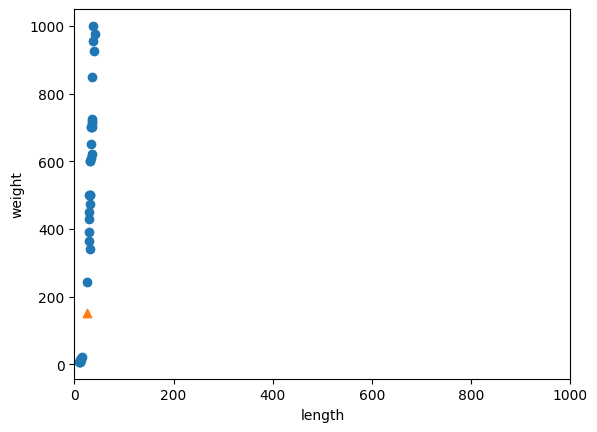

In [31]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # ^ -> 삼각형, D -> 다이아몬드
plt.xlabel('length')
plt.ylabel('weight')
plt.xlim(0, 1000)
plt.show()

In [ ]:
"""
 -  무게이든 길이든 모두 중요한 특성!, 수치가 크다고 해서 특정 특성을 중요하게 볼 필요 X
 - 수치를 동일한 기준의 범위로 변환 - 정규화
    예) 표준점수
    분산 : (측정값 - 평균)^2 + (측정값 - 평균) + (측정값 - 평균) ... / 총 샘플 갯수
    표준편차 : 분산에 제곱근
    표준점수 : (측정값 - 평균) + (측정값 - 평균) + (측정값 - 평균) ... / 표준편차

"""

# kn.kneighbors([[...],[...]]) : 반환값(거리, 근처에 있는 요소 인덱스)

In [33]:
distances, indexes = kn.kneighbors([[25, 150]])

In [34]:
indexes

array([[21, 33, 19, 30,  1]])

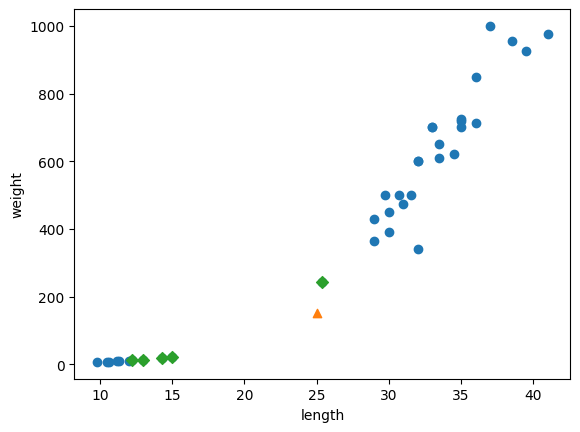

In [35]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')  # ^ -> 삼각형, D -> 다이아몬드
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [38]:
mean = np.mean(train_input, axis=0) # 행별(특성별) 평균
std = np.std(train_input, axis=0) # 행별(특성별) 표준편차

In [39]:
train_scaled = (train_input - mean) / std # 표준점수

In [40]:
kn.fit(train_scaled, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [41]:
fish = np.array([[25, 150]])
fish_scaled = (fish - mean) / std
fish_scaled

array([[-0.23012627, -0.94060693]])

In [42]:
kn.predict(fish_scaled)

array([1.])

In [ ]:
distances, indexes = kn.kneighbors(fish_scaled)
indexes

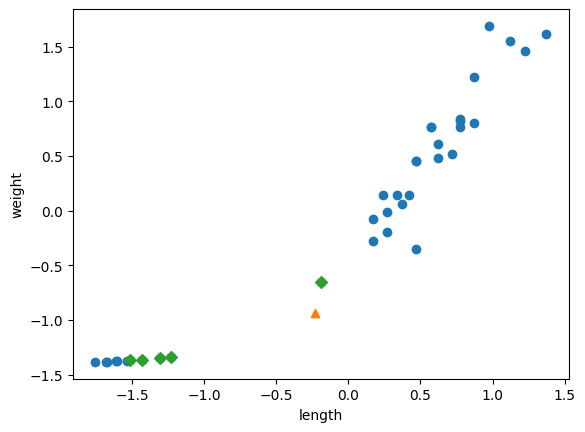

In [43]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(fish_scaled[0][0], fish_scaled[0][1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()